<a href="https://colab.research.google.com/github/cjfergie/AAPL-Stock-Econometric-Models-and-Analysis-Using-Alpha-Wave-Data-APIs/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2024-03-19 03:04:31--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  60.8MB/s    in 0.4s    

2024-03-19 03:04:32 (60.8 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('sp500sub.csv', index_col = 'Date', parse_dates=True)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')

In [ ]:
df['Name'].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [ ]:
#names = df['Name].unique()
names = ['GOOG', 'SBUX', 'KISS', 'NEM']

In [ ]:
252/2

126.0

In [ ]:
all_dates = df.index.unique().sort_values()

In [ ]:
len(all_dates)

2267

In [ ]:
all_dates.get_loc('2014-01-02')

1007

In [ ]:
all_dates.get_loc('2014-06-30')

1130

In [ ]:
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2014-06-30')
dates = all_dates[start:end+1]

In [ ]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
len(dates)

124

In [ ]:
close_prices = pd.DataFrame(index=dates)

In [ ]:
tmp1 = df.loc[dates]
for name in names:
  df_sym = tmp1[tmp1['Name'] == name]
  df_tmp = pd.DataFrame(data=df_sym['Close'].to_numpy(), \
                        index=df_sym.index, columns=[name])
  close_prices = close_prices.join(df_tmp) #left join by default

In [ ]:
close_prices.head()

,GOOG,SBUX,KISS,NEM
Date,,,,
2014-01-02,554.481689,38.584999,NaN,23.959999
2014-01-03,550.436829,38.474998,NaN,23.920000
2014-01-06,556.573853,38.084999,NaN,24.080000
2014-01-07,567.303589,38.605000,NaN,23.950001
2014-01-08,568.484192,39.014999,NaN,23.400000


In [ ]:
close_prices.isna().sum().sum()

124

In [ ]:
close_prices.fillna(method='ffill', inplace=True)

In [ ]:
close_prices.isna().sum().sum()

124

In [ ]:
#empty data frame
returns = pd.DataFrame(index=dates[1:])

In [ ]:
for name in names:
  current_returns = close_prices[name].pct_change()
  returns[name] = current_returns.iloc[1:] * 100

In [ ]:
returns.head()

,GOOG,SBUX,KISS,NEM
Date,,,,
2014-01-03,-0.729485,-0.285086,NaN,-0.166941
2014-01-06,1.114937,-1.013644,NaN,0.668896
2014-01-07,1.927819,1.365368,NaN,-0.539864
2014-01-08,0.208108,1.062038,NaN,-2.296456
2014-01-09,-0.962997,-0.551071,NaN,-0.854696


In [ ]:
mean_return = returns.mean()
mean_return

GOOG    0.038691
SBUX    0.009955
KISS         NaN
NEM     0.072932
dtype: float64

In [ ]:
cov = returns.cov()
cov

,GOOG,SBUX,KISS,NEM
GOOG,2.206565,0.832469,NaN,-0.033600
SBUX,0.832469,1.558406,NaN,0.374448
KISS,NaN,NaN,NaN,NaN
NEM,-0.033600,0.374448,NaN,4.815104


In [ ]:
cov_np = cov.to_numpy()
cov_np

array([[ 2.20656478,  0.832469  ,         nan, -0.03360028],
       [ 0.832469  ,  1.55840635,         nan,  0.37444817],
       [        nan,         nan,         nan,         nan],
       [-0.03360028,  0.37444817,         nan,  4.81510393]])

In [ ]:
N = 10000
D = len(mean_return)
returns = np.zeros(N)
risks = np.zeros(N)
random_weights = []
for i in range(N):
  rand_range = 1.0
  w = np.random.random(D)*rand_range - rand_range / 2 #with short selling
  w[-1] = 1 - w[:-1].sum()
  np.random.shuffle(w)
  random_weights.append(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov_np).dot(w))
  returns[i] = ret
  risks[i] = risk

In [ ]:
single_asset_returns = np.zeros(D)
single_asset_risks = np.zeros(D)
for i in range(D):
  ret = mean_return[i]
  risk = np.sqrt(cov_np[i,i])

  single_asset_returns[i] = ret
  single_asset_risks[i] = risk

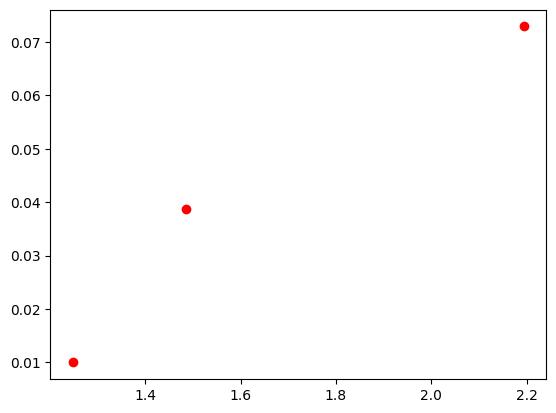

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.scatter(single_asset_risks, single_asset_returns, c='red');

In [ ]:
for idx, val in cov['GOOG'].iteritems():
  print(idx, val)

GOOG 2.2065647788398786
SBUX 0.8324690007152388
KISS nan
NEM -0.033600280334163


<ipython-input-31-71544aada479>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, val in cov['GOOG'].iteritems():


In [ ]:
for idx, val in cov['GOOG'].items(): # .items to be used instead of iteritems
  print(idx, val)

GOOG 2.2065647788398786
SBUX 0.8324690007152388
KISS nan
NEM -0.033600280334163


# Max and Min Return

In [ ]:
from scipy.optimize import linprog

In [ ]:
D = len(mean_return)

In [ ]:
A_eq = np.ones((1, D))
b_eq = np.ones(1)

In [ ]:
### NOTE: The bounds are by default (0, None) unless otherwise specified.
# bounds = None
bounds = [(-0.5, None)]*D
bounds

[(-0.5, None), (-0.5, None), (-0.5, None), (-0.5, None)]

In [ ]:
#minimize
res = linprog(mean_return, A_eq=A_eq, b_eq=b_eq, bounds=bounds)
res


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -0.06078902062505727
              x: [-5.000e-01 -5.000e-01  2.500e+00 -5.000e-01]
            nit: 0
          lower:  residual: [ 0.000e+00  0.000e+00  3.000e+00  0.000e+00]
                 marginals: [ 3.869e-02  9.955e-03  0.000e+00  7.293e-02]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-0.000e+00]
        ineqlin:  residual: []
                 marginals: []
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [ ]:
min_return = res.fun

In [ ]:
# maximize
max_return = -res.fun
max_return

0.06078902062505727

In [ ]:
min_return, max_return

(-0.06078902062505727, 0.06078902062505727)

# Mean-Variance Optimal Portfolios

In [ ]:
N = 100
target_returns = np.linspace(min_return, max_return, num=N)

In [ ]:
from scipy.optimize import minimize

In [ ]:
def get_portfolio_variance(weights):
  return weights.dot(cov).dot(weights)


In [ ]:
def target_return_constraint(weights, target):
  return weights.dot(mean_return) - target


In [ ]:
def portfolio_constraint(weights):
  return weights.sum() - 1

In [ ]:
constraints = [
    {
        'type': 'eq',
        'fun': target_return_constraint,
        'args': [target_returns[0]], # will be updated in loop
    },
    {
        'type': 'eq',
        'fun': portfolio_constraint,
    }
]

In [ ]:
# check if it works
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
)
res

 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan        nan        nan]
     nit: 100
     jac: [       nan        nan        nan        nan]
    nfev: 1589
    njev: 100

In [ ]:
# Let's limit the magnitude of the weights
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints=constraints,
    bounds=bounds,
)
res

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [       nan        nan        nan        nan]
    nfev: 5
    njev: 1

In [ ]:
optimized_risks = []
for target in target_returns:
  # set target return constraint
  constraints[0]['args'] = [target]

  res = minimize(
      fun=get_portfolio_variance,
      x0=np.ones(D) / D, # uniform
      method='SLSQP',
      constraints=constraints,
      bounds=bounds,
  )
  optimized_risks.append(np.sqrt(res.fun))
  if res.status != 0:
    print(res)

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [       nan        nan        nan        nan]
    nfev: 5
    njev: 1
 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [       nan        nan        nan        nan]
    nfev: 5
    njev: 1
 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [       nan        nan        nan        nan]
    nfev: 5
    njev: 1
 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [       nan        nan        nan        nan]
    nfev: 5
    njev: 1
 message: Inequality constraints incompatible
 success: 

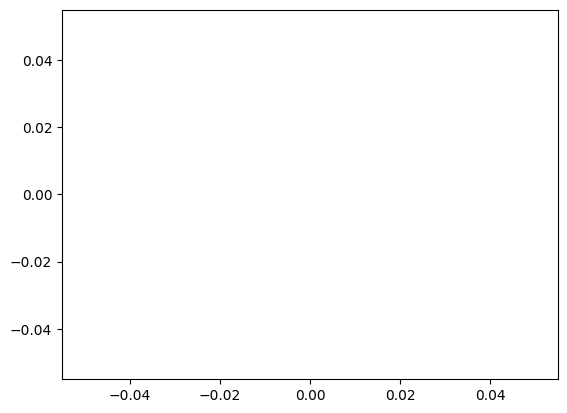

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

In [ ]:
# min variance portfolio
# limiting the magnitude of the weights
res = minimize(
    fun=get_portfolio_variance,
    x0=np.ones(D) / D, # uniform
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds,
)
res

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [       nan        nan        nan        nan]
    nfev: 5
    njev: 1

In [ ]:
mv_risk = np.sqrt(res.fun)
mv_weights = res.x
mv_ret = mv_weights.dot(mean_return)

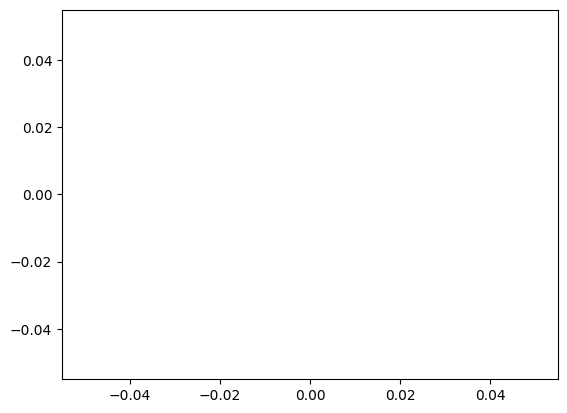

In [ ]:
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');
plt.scatter([mv_risk], [mv_ret], c='red');

#Sharpe Ratio

In [ ]:
# https://fred.stlouisfed.org/series/TB3MS
risk_free_rate = 0.03 / 252

In [ ]:
def neg_sharpe_ratio(weights):
  mean = weights.dot(mean_return)
  sd = np.sqrt(weights.dot(cov).dot(weights))
  return - (mean - risk_free_rate) / sd

In [ ]:
res = minimize(
    fun=neg_sharpe_ratio,
    x0=np.ones(D) / D, # uniform,
    method='SLSQP',
    constraints={
        'type': 'eq',
        'fun': portfolio_constraint,
    },
    bounds=bounds
)
res

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: nan
       x: [ 2.500e-01  2.500e-01  2.500e-01  2.500e-01]
     nit: 1
     jac: [       nan        nan        nan        nan]
    nfev: 5
    njev: 1

In [ ]:
best_sr, best_w = -res.fun, res.x

In [ ]:
mc_best_w = None
mc_best_sr = float('-inf')
for i, (risk, ret) in enumerate(zip(risks, returns)):
  sr = (ret - risk_free_rate) / risk
  if sr > mc_best_sr:
    mc_best_sr = sr
    mc_best_w = random_weights[i]
print(mc_best_w, mc_best_sr)

None -inf


AttributeError: 'NoneType' object has no attribute 'dot'

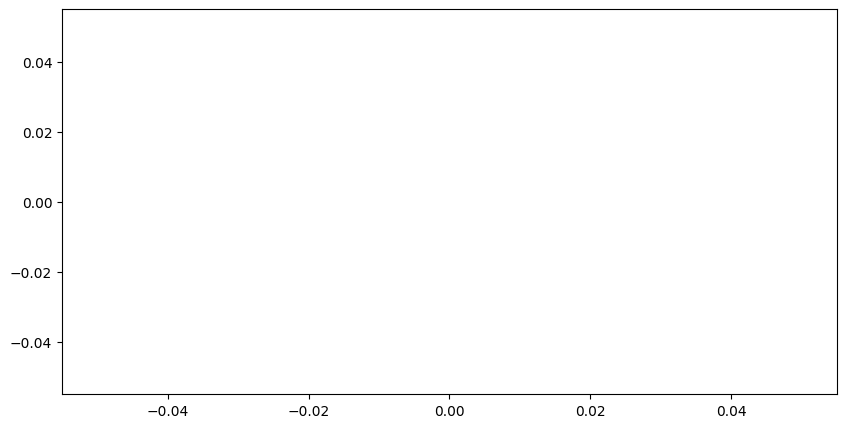

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red');

# found by monte carlo simulation
mc_risk = np.sqrt(mc_best_w.dot(cov).dot(mc_best_w))
mc_ret = mean_return.dot(mc_best_w)
plt.scatter([mc_risk], [mc_ret], c='pink');

#Risk Free Asset With Tangency Portfolio

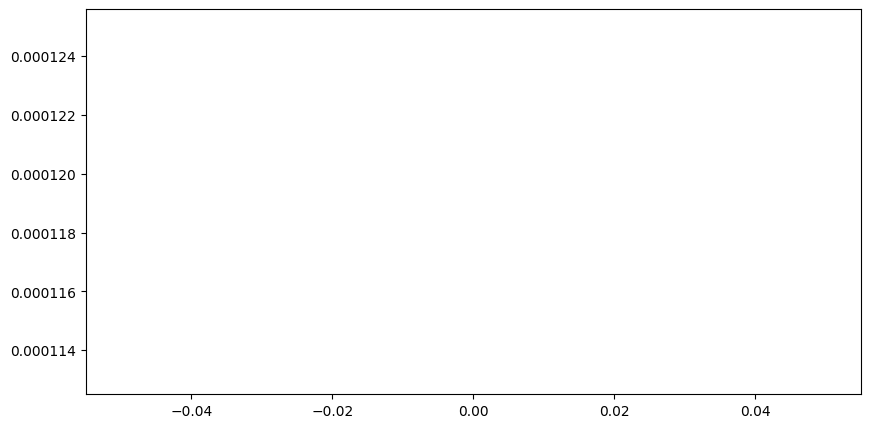

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(risks, returns, alpha=0.1);
plt.plot(optimized_risks, target_returns, c='black');

# found by optimization
opt_risk = np.sqrt(best_w.dot(cov).dot(best_w))
opt_ret = mean_return.dot(best_w)
plt.scatter([opt_risk], [opt_ret], c='red');

# tangent line
x1 = 0
y1 = risk_free_rate
x2 = opt_risk
y2 = opt_ret
plt.plot([x1, x2], [y1, y2]);